# Fraudulent firm classification Part - 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Reading the Data

In [2]:
audit_risk = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

# Exploratory Data Analysis of "audit_risk"

In [3]:
audit_risk.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [4]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [5]:
audit_risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [7]:
for i in audit_risk:
    print(i)
    print(np.unique(audit_risk[i]))

Sector_score
[ 1.85  1.99  2.34  2.36  2.37  2.72  3.41  3.89 15.56 17.68 21.61 55.57
 59.85]
LOCATION_ID
['1' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23'
 '24' '25' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38'
 '39' '4' '40' '41' '42' '43' '44' '5' '6' '7' '8' '9' 'LOHARU' 'NUH'
 'SAFIDON']
PARA_A
[0.000e+00 6.000e-04 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02
 6.000e-02 7.000e-02 9.000e-02 1.000e-01 1.100e-01 1.400e-01 1.500e-01
 1.700e-01 1.800e-01 1.900e-01 2.000e-01 2.100e-01 2.300e-01 2.400e-01
 2.500e-01 2.600e-01 2.700e-01 2.800e-01 2.900e-01 3.000e-01 3.100e-01
 3.200e-01 3.300e-01 3.400e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01
 4.000e-01 4.100e-01 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01
 4.700e-01 4.800e-01 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01
 5.400e-01 5.500e-01 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01
 6.100e-01 6.200e-01 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.700e-01
 6.800e-01 6.900e

# Exploratory Data Analysis of "trial"

In [8]:
trial.dtypes

Sector_score     float64
LOCATION_ID       object
PARA_A           float64
SCORE_A            int64
PARA_B           float64
SCORE_B            int64
TOTAL            float64
numbers          float64
Marks              int64
Money_Value      float64
MONEY_Marks        int64
District           int64
Loss               int64
LOSS_SCORE         int64
History            int64
History_score      int64
Score            float64
Risk               int64
dtype: object

In [9]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [10]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [11]:
trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


# Merging audit_risk and trial

In [12]:
trial_d = trial.drop(['Sector_score','PARA_A','SCORE_A','PARA_B','TOTAL','numbers','Money_Value','History','Score','LOCATION_ID','SCORE_B'], axis = 1)


### Risk in both data set have different values, renaming risk in trial as Risk_t

In [13]:
trial_d = trial_d.rename( columns={"Risk": "Risk_t"})

In [14]:
df = pd.concat([audit_risk,trial_d], axis = 1,join_axes=[audit_risk.index])

### EDA on merged Dataset " df "

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 34 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [16]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_t
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.5,7.168158,0.393041,2.237113,2.909794,2.505155,0.029639,2.061856,2.167526,0.626289
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.0,38.667494,0.488741,0.803517,1.597452,1.228678,0.184280,0.375080,0.679869,0.484100
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.5,0.316700,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.5,0.555600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.5,3.249900,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


In [17]:
df.shape

(776, 34)

## Removing null Values and Rows with text data location Id

In [18]:
df['Money_Value'].median()

0.09

In [19]:
df.replace(np.nan, 0.09, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 34 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [21]:
df[pd.to_numeric(df['LOCATION_ID'], errors='coerce').isnull()]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_t
351,1.99,LOHARU,0.30,0.2,0.060,0.0,0.2,0.0,0.30,5.0,...,0.5,0.2920,0,2,2,2,0,2,2,0
355,1.99,NUH,0.55,0.2,0.110,0.0,0.2,0.0,0.55,5.0,...,0.5,0.3288,0,2,2,2,0,2,2,0
367,1.99,SAFIDON,0.48,0.2,0.096,0.0,0.2,0.0,0.48,5.0,...,0.5,0.3180,0,2,2,2,0,2,2,0


In [22]:
location = df.LOCATION_ID.unique()

In [23]:
location

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [24]:
numb= np.array(['1', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '27', '28', '29', '3', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '43', '44', '5', '6', '7', '8', '9'])
numb = numb.astype(int)
numb.sort()
numb

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44])

In [25]:
df.loc[df.LOCATION_ID == 'LOHARU', 'LOCATION_ID'] = 10
df.loc[df.LOCATION_ID == 'NUH', 'LOCATION_ID'] = 26
df.loc[df.LOCATION_ID == 'SAFIDON', 'LOCATION_ID'] = 45

In [26]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_t
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.0,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.5,7.168158,0.393041,2.237113,2.909794,2.505155,0.029639,2.061856,2.167526,0.626289
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.0,38.667494,0.488741,0.803517,1.597452,1.228678,0.184280,0.375080,0.679869,0.484100
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.5,0.316700,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.5,0.555600,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,1.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.5,3.249900,1.000000,2.000000,4.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000,1.000000


### Creating independent and target variables

In [27]:
X = df.drop(['Risk_t','Risk','Audit_Risk','LOCATION_ID'], axis = 1) 

In [28]:
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,2.4,8.574,0.4,0.5,2,2,2,0,2,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,2.0,2.554,0.4,0.5,2,2,2,0,2,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,2.0,1.548,0.4,0.5,2,2,2,0,2,2
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,4.4,17.530,0.4,0.5,6,6,2,0,2,2
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,2.0,1.416,0.4,0.5,2,2,2,0,2,2


In [30]:
y = df['Audit_Risk']
y1 = df['Risk_t']

## Feature selection using Chi^2, Lasso, TreeClassifier and Correlation

## Chi^2

[4.092e+03 6.657e+03 2.898e+01 4.431e+03 1.703e+05 4.052e+01 1.046e+05
 1.458e+05 4.271e+00 1.122e+01 9.314e+01 2.331e+05 5.225e+01 1.436e+05
 1.582e+02 1.656e+00 4.815e+01 1.215e+03 1.106e+01 7.798e+02 1.707e+02
 1.282e+05 1.505e+02 3.739e-30 1.122e+02 5.225e+02 1.582e+02 2.564e+02
 1.656e+01 1.106e+02]


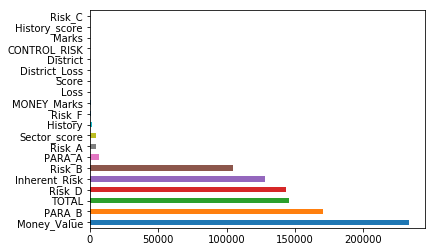

In [31]:
y=y.astype('int')
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
feat_importances = pd.Series(fit.scores_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Lasso

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



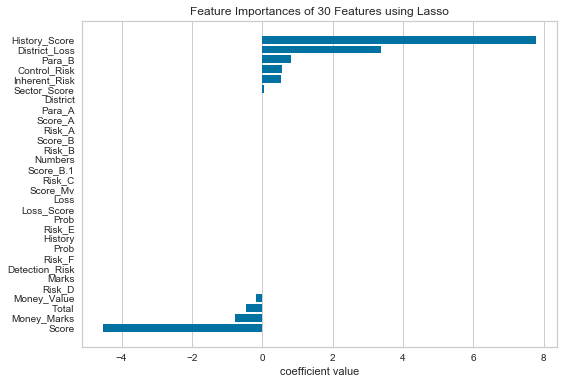

In [32]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

from yellowbrick.features.importances import FeatureImportances

fig = plt.figure()
ax = fig.add_subplot()

labels = list(map(lambda s: s.title(),  X.columns))
viz = FeatureImportances(Lasso(), ax=ax, labels=labels, relative=False)

viz.fit(X, y)
viz.poof()

## Extra tree classifier

[4.456e-02 6.499e-02 2.837e-01 2.120e-02 8.667e-03 1.045e-01 2.363e-02
 1.089e-02 1.705e-03 7.532e-03 4.285e-03 3.300e-03 1.701e-02 1.775e-04
 4.618e-02 9.697e-04 2.556e-02 6.810e-04 0.000e+00 3.962e-04 1.516e-01
 1.997e-02 1.785e-02 0.000e+00 5.785e-03 6.402e-02 6.374e-02 0.000e+00
 1.086e-03 5.927e-03]


c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



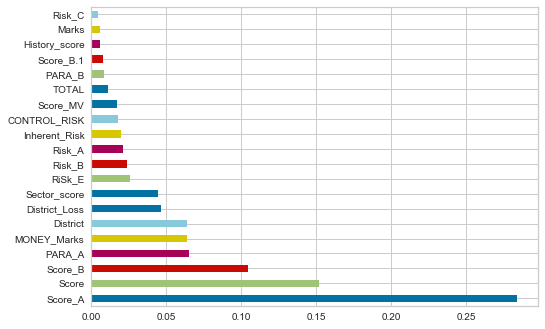

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y1)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Correlation Plot

In [34]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1,-0.216824,-0.425198,-0.219025,-0.13267,-0.218967,-0.130589,-0.153316,-0.15184,-0.170404,-0.166464,-0.117821,-0.31891,-0.116164,-0.108202,-0.0867504,-0.128546,-0.114798,-0.1369,-0.103223,-0.337326,-0.173278,-0.15495,nan,-0.170404,-0.31891,-0.108202,-0.083153,-0.0867504,-0.1369
PARA_A,-0.216824,1,0.49668,0.999267,0.16194,0.35855,0.161834,0.267042,0.133786,0.140648,0.140455,0.449367,0.285991,0.448555,0.127804,0.0437072,0.118941,0.118279,0.172635,0.103981,0.426659,0.481859,0.149198,nan,0.140648,0.285991,0.127804,0.0453931,0.0437072,0.172635
Score_A,-0.425198,0.49668,1,0.504878,0.249438,0.572655,0.248188,0.297547,0.242692,0.274594,0.265983,0.206261,0.478876,0.203678,0.0886623,0.0936475,0.102677,0.177932,0.265322,0.150925,0.720488,0.32092,0.170872,nan,0.274594,0.478876,0.0886623,0.0933447,0.0936475,0.265322
Risk_A,-0.219025,0.999267,0.504878,1,0.165287,0.362971,0.165143,0.270223,0.135613,0.143103,0.142708,0.448751,0.290751,0.447913,0.127372,0.0437346,0.118641,0.121132,0.176159,0.106561,0.432505,0.483291,0.150778,nan,0.143103,0.290751,0.127372,0.0458658,0.0437346,0.176159
PARA_B,-0.13267,0.16194,0.249438,0.165287,1,0.347568,0.999936,0.9941,0.209855,0.230851,0.223054,0.125084,0.314548,0.124671,0.0829438,0.0425507,0.0793935,0.203582,0.316541,0.196048,0.397155,0.654453,0.186709,nan,0.230851,0.314548,0.0829438,0.0448133,0.0425507,0.316541
Score_B,-0.218967,0.35855,0.572655,0.362971,0.347568,1,0.348152,0.379336,0.277576,0.313798,0.303009,0.205256,0.567591,0.202174,-0.00465439,0.0925665,0.0153245,0.200841,0.309505,0.171271,0.901276,0.365662,0.127827,nan,0.313798,0.567591,-0.00465439,0.0988697,0.0925665,0.309505
Risk_B,-0.130589,0.161834,0.248188,0.165143,0.999936,0.348152,1,0.994023,0.209596,0.230547,0.222742,0.125119,0.313089,0.124717,0.0831294,0.0428754,0.0797308,0.202823,0.316375,0.195292,0.396947,0.654505,0.186409,nan,0.230547,0.313089,0.0831294,0.0451087,0.0428754,0.316375
TOTAL,-0.153316,0.267042,0.297547,0.270223,0.9941,0.379336,0.994023,1,0.217641,0.238237,0.230697,0.168726,0.337467,0.168233,0.0933415,0.0464705,0.089204,0.210752,0.326396,0.202159,0.433828,0.689772,0.197319,nan,0.238237,0.337467,0.0933415,0.048863,0.0464705,0.326396
numbers,-0.15184,0.133786,0.242692,0.135613,0.209855,0.277576,0.209596,0.217641,1,0.90814,0.955304,0.186244,0.446666,0.186568,0.12501,0.0358074,0.136956,0.202327,0.209598,0.202385,0.502827,0.271115,0.228657,nan,0.90814,0.446666,0.12501,-0.00148425,0.0358074,0.209598
Score_B.1,-0.170404,0.140648,0.274594,0.143103,0.230851,0.313798,0.230547,0.238237,0.90814,1,0.990412,0.22041,0.507248,0.220641,0.150369,0.0368989,0.157595,0.226177,0.248423,0.223343,0.565976,0.308543,0.256551,nan,1,0.507248,0.150369,0.00476134,0.0368989,0.248423


### Removing Outliers 

In [35]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_in = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_in
result=remove_outlier(df, 'Audit_Risk')

In [36]:
df = result

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 775
Data columns (total 34 columns):
Sector_score      643 non-null float64
LOCATION_ID       643 non-null object
PARA_A            643 non-null float64
Score_A           643 non-null float64
Risk_A            643 non-null float64
PARA_B            643 non-null float64
Score_B           643 non-null float64
Risk_B            643 non-null float64
TOTAL             643 non-null float64
numbers           643 non-null float64
Score_B.1         643 non-null float64
Risk_C            643 non-null float64
Money_Value       643 non-null float64
Score_MV          643 non-null float64
Risk_D            643 non-null float64
District_Loss     643 non-null int64
PROB              643 non-null float64
RiSk_E            643 non-null float64
History           643 non-null int64
Prob              643 non-null float64
Risk_F            643 non-null float64
Score             643 non-null float64
Inherent_Risk     643 non-null float64
CON

## Best features selected with scaled columns selected from whole data set

In [38]:
X = df[['District','Money_Value','PARA_A','PARA_B','Score','MONEY_Marks','Sector_score','History','Inherent_Risk']]

In [39]:
X.head()

,District,Money_Value,PARA_A,PARA_B,Score,MONEY_Marks,Sector_score,History,Inherent_Risk
0,2,3.38,4.18,2.50,2.4,2,3.89,0,8.574
1,2,0.94,0.00,4.83,2.0,2,3.89,0,2.554
2,2,0.00,0.51,0.23,2.0,2,3.89,0,1.548
3,2,11.75,0.00,10.80,4.4,6,3.89,0,17.530
4,2,0.00,0.00,0.08,2.0,2,3.89,0,1.416


In [40]:
y = df['Audit_Risk']

## Splitting Test and Train data set for Regression
## Doing feature scaling using Standard scaler
#### Standard scaler is used because we have removed the outliers and minmax scaler might skew the data more.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



# Regression Task
## Any two models with bagging

## 1. Decision Tree Regressor

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(max_depth=2, random_state = 0)
param_grid = { 
    'n_estimators':[10,50,100,300,500],
    'max_samples': [10,50,100,150,200]
    
}
bag_reg = BaggingRegressor(base_estimator=dt_reg, random_state=0)
bag_reg.fit(X_train, y_train)
CV_dtr = GridSearchCV(estimator=bag_reg, param_grid=param_grid)
CV_dtr.fit(X_train, y_train)
CV_dtr.best_params_

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'max_samples': 150, 'n_estimators': 100}

In [43]:
bag_reg = BaggingRegressor(dt_reg, n_estimators=100, max_samples=150, bootstrap=True, random_state=0,oob_score=True)

bag_reg.fit(X_train, y_train)
y_pred_tree = bag_reg.predict(X_test)

In [44]:
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.88
Test score: 0.83


In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test, y_pred_tree)

0.8285291465740535

# 2. Linear Regressor

In [47]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
bag_reg = BaggingRegressor(lreg, n_estimators=500, max_samples=100, bootstrap=True, oob_score=True)

bag_reg.fit(X_train, y_train)
y_pred_linear = bag_reg.predict(X_test)

In [48]:
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.93
Test score: 0.91


In [49]:
r2_score(y_test, y_pred_linear)

0.9082660475978852

# Pasting 
# 2. Decision tree regressor

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
dtr=DecisionTreeRegressor(max_depth=2, random_state = 0)
param_grid = { 
    'n_estimators':[10,50,100,500,600],
    'max_samples': [10,50,100,150,200]
    
}
bag_reg = BaggingRegressor(base_estimator=dtr, random_state=0)
bag_reg.fit(X_train, y_train)
CV_dtr = GridSearchCV(estimator=bag_reg, param_grid=param_grid)
CV_dtr.fit(X_train, y_train)
CV_dtr.best_params_

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'max_samples': 150, 'n_estimators': 100}

In [51]:
dt_reg = DecisionTreeRegressor(random_state=0)
bag_reg = BaggingRegressor(dt_reg, n_estimators=500, max_samples=150, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred_tree1 = bag_reg.predict(X_test)

In [52]:
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.96
Test score: 0.90


In [53]:
r2_score(y_test, y_pred_tree1)

0.9007582923465232

# 2. Linear Regressor

In [54]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
bag_reg = BaggingRegressor(lreg, n_estimators=500, max_samples=100, bootstrap=False)

bag_reg.fit(X_train, y_train)
y_pred_linear1 = bag_reg.predict(X_test)

In [55]:
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.93
Test score: 0.91


In [56]:
r2_score(y_test, y_pred_linear1)

0.9068426406377335

# Adaboost boosting

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
dtr=DecisionTreeRegressor(max_depth=2)
param_grid = { 
    'n_estimators':[10,50,100],
    'learning_rate': [0.1,0.5,1]
    
}
ada_reg1 = AdaBoostRegressor(base_estimator=dtr, random_state=0)
ada_reg1.fit(X_train, y_train)
CV_dtr = GridSearchCV(estimator=ada_reg1, param_grid=param_grid)
CV_dtr.fit(X_train, y_train)
CV_dtr.best_params_

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'learning_rate': 0.1, 'n_estimators': 100}

In [58]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=10, learning_rate=0.1, random_state=0)

ada_reg1.fit(X_train, y_train)

print("Accuracy on train set: {:.3f}".format(ada_reg1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_reg1.score(X_test, y_test)))

Accuracy on train set: 0.855
Accuracy on test set: 0.747


In [59]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(5)
param_grid = { 
    'n_estimators':[10,50,100],
    'learning_rate': [0.1,0.5,1]
    
}
ada_reg2 = AdaBoostRegressor(base_estimator=knr, random_state=0)
ada_reg2.fit(X_train, y_train)
CV_knn = GridSearchCV(estimator=ada_reg2, param_grid=param_grid)
CV_knn.fit(X_train, y_train)
CV_knn.best_params_

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



{'learning_rate': 0.1, 'n_estimators': 100}

In [60]:
knr = KNeighborsRegressor(5)

ada_reg2 = AdaBoostRegressor(knr, n_estimators=10, learning_rate=0.1, random_state=0)
ada_reg2.fit(X_train, y_train)

print("Accuracy on train set: {:.3f}".format(ada_reg2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_reg2.score(X_test, y_test)))

Accuracy on train set: 0.943
Accuracy on test set: 0.905


# Gradient boosting 

In [61]:
from  sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)
print("Accuracy on train set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on train set: 0.938
Accuracy on test set: 0.865


In [83]:
model_list=['ridge', 'lr', 'knn', 'lasso', 'poly', 'svrpoly', 'svrrbf', 'svrlinear']
train_score_list_before_pca=[0.9368148411228485, 0.9368111274554357, 0.9365968916699291, 0.9347652557253715, 0.9256588754859282,0.84,0.92,0.92]
test_score_list_before_pca=[0.9112650494615576, 0.9116250472636681, 0.9136703105831946, 0.91561311388971, 0.9225855728566679,1,1,0.92]
print(model_list)
print(train_score_list_before_pca)
print(test_score_list_before_pca)

['ridge', 'lr', 'knn', 'lasso', 'poly', 'svrpoly', 'svrrbf', 'svrlinear']
[0.9368148411228485, 0.9368111274554357, 0.9365968916699291, 0.9347652557253715, 0.9256588754859282, 0.84, 0.92, 0.92]
[0.9112650494615576, 0.9116250472636681, 0.9136703105831946, 0.91561311388971, 0.9225855728566679, 1, 1, 0.92]


# PCA on X_train and X_test

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

# Finding the best parameters from all regression in Project 1

## KNN- Regression


In [64]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,25):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

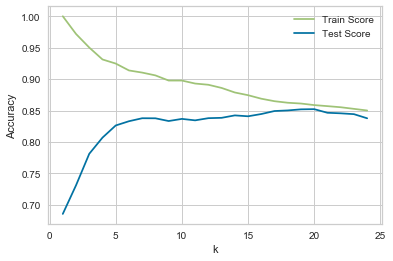

In [65]:
x_axis = range(1,25)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print('Training Accuracy for Linear regression:{:.4f}'.format(lreg.score(X_train, y_train)))
print('Test Accuracy for Linear regression:{:.4f}'.format(lreg.score(X_test, y_test)))

Training Accuracy for Linear regression:0.9168
Test Accuracy for Linear regression:0.7928


## Ridge Regression

In [67]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list1 = []
test_score_list1 = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list1.append(ridge.score(X_train,y_train))
    test_score_list1.append(ridge.score(X_test, y_test))
print('Training Accuracies for ridge regression:',train_score_list1)
print('Test Accuracy for Ridge regression:',test_score_list1)

Training Accuracies for ridge regression: [0.9167806377327671, 0.9167806319686577, 0.9167800571656319, 0.9167241379966337, 0.9123329166413683, 0.7820610043822909]
Test Accuracy for Ridge regression: [0.7927848041787551, 0.7928224576889438, 0.7931977047131767, 0.7968246002719453, 0.8230826308198784, 0.795163563449558]


<IPython.core.display.Javascript object>


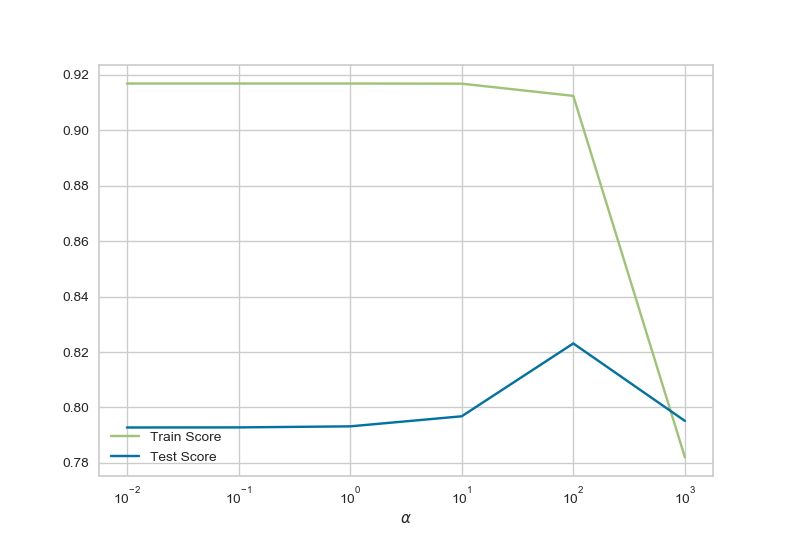

Text(0.5, 0, '$\\alpha$')

In [69]:
%matplotlib notebook
plt.plot(x_range, train_score_list1, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list1, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

# Lasso Regression

In [70]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list2 = []
test_score_list2 = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list2.append(lasso.score(X_train,y_train))
    test_score_list2.append(lasso.score(X_test, y_test))
print('Training Accuracies for Lasso:',train_score_list2)
print('Test Accuracies for Lasso:',test_score_list2)

Training Accuracies for Lasso: [0.9165452585878398, 0.8969443350007924, 0.7244596376737465, 0.0, 0.0]
Test Accuracies for Lasso: [0.8020949392381724, 0.8518245594688286, 0.7729833560300362, -0.007732814108786901, -0.007732814108786901]


<IPython.core.display.Javascript object>


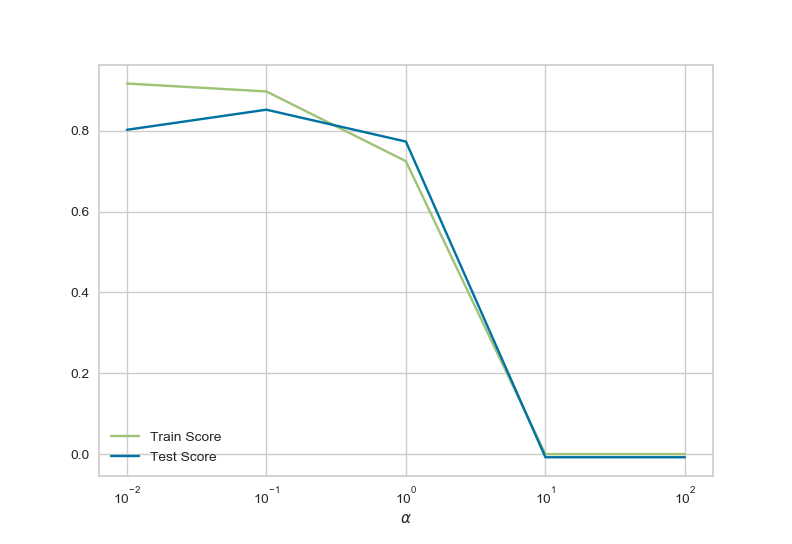

Text(0.5, 0, '$\\alpha$')

In [71]:
%matplotlib notebook
plt.plot(x_range, train_score_list2, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list2, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

## Polynomial Regression

In [72]:
from  sklearn.preprocessing  import PolynomialFeatures
x_range = [1,2]
train_score_list3 = []
test_score_list3 = []

for n in x_range:
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list3.append(lreg.score(X_train_poly, y_train))
    test_score_list3.append(lreg.score(X_test_poly, y_test))
print(train_score_list3)
print(test_score_list3)

[0.9167806377910066, 0.9637263453573609]
[0.7927806190060158, -8.184910196717086]


<IPython.core.display.Javascript object>


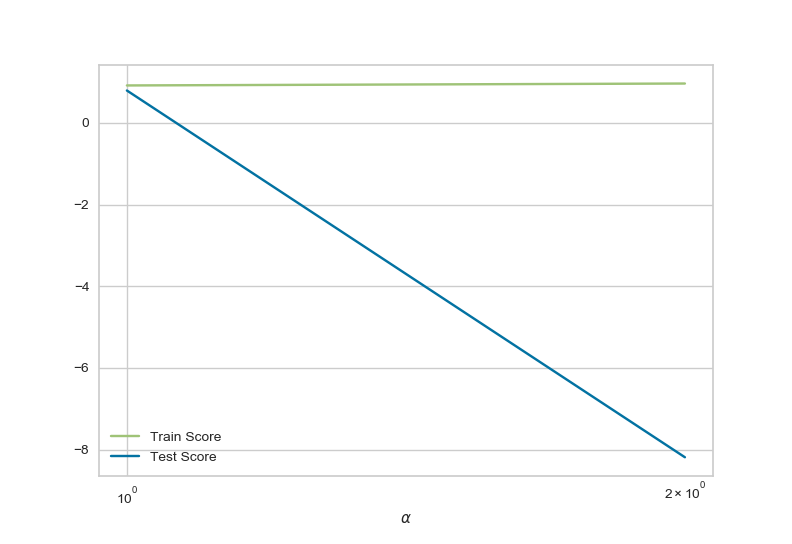

Text(0.5, 0, '$\\alpha$')

In [73]:
%matplotlib notebook
plt.plot(x_range,train_score_list3, c = 'g', label = 'Train Score')
plt.plot(x_range,test_score_list3, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [78]:

train_score_after_pca = []
test_score_after_pca = []

ridge = Ridge(0.01)
ridge.fit(X_train,y_train)
train_score_after_pca.append(ridge.score(X_train,y_train))
test_score_after_pca.append(ridge.score(X_test, y_test))


lreg = LinearRegression()
lreg.fit(X_train, y_train)
train_score_after_pca.append(lreg.score(X_train, y_train))
test_score_after_pca.append(lreg.score(X_test, y_test))

knn = KNeighborsRegressor(20)
knn.fit(X_train, y_train)
train_score_after_pca.append(knn.score(X_train, y_train))
test_score_after_pca.append(knn.score(X_test, y_test))

lasso = Lasso(0.01)
lasso.fit(X_train,y_train)
train_score_after_pca.append(lasso.score(X_train,y_train))
test_score_after_pca.append(lasso.score(X_test, y_test))

poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
train_score_after_pca.append(lreg.score(X_train_poly, y_train))
test_score_after_pca.append(lreg.score(X_test_poly, y_test))

from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
        clf = SVR(kernel = 'linear',gamma = 'scale',C=C)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C}
clf = SVR(**best_parameters)
clf.fit(X_test, y_test)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
train_score_after_pca.append(train_score)
test_score_after_pca.append(test_score)


from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
    for gamma in [0.01, 0.1,1, 10, 100]:
        clf = SVR(kernel = 'rbf',gamma = gamma,C=C)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
clf = SVR(**best_parameters)
clf.fit(X_test, y_test)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
train_score_after_pca.append(train_score)
test_score_after_pca.append(test_score)

from sklearn.svm import SVR
best_score = 0

for C in [0.01, 0.1, 1, 10, 100]:
    for epsilon in [0.01, 0.1, 1, 10, 100]:
        clf = SVR(kernel = 'poly',gamma ='scale', epsilon = epsilon,C=C)
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'epsilon': epsilon}
clf = SVR(**best_parameters)
clf.fit(X_test, y_test)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
train_score_after_pca.append(train_score)

test_score_after_pca.append(test_score)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [82]:
print(model_list)
print(test_score_list_before_pca)
print(test_score_after_pca)

['ridge', 'lr', 'knn', 'lasso', 'poly', 'svrpoly', 'svrrbf', 'svrlinear']
[0.9112650494615576, 0.9116250472636681, 0.9136703105831946, 0.91561311388971, 0.9225855728566679]
[0.7927848041787551, 0.792780619006016, 0.8522195521880532, 0.8020949392381724, 0.7927806190060158, 0.9966272478632826, 0.9955995910244256, 0.9998278816580097]


In [84]:
import pandas as pd
Comp_clsf = {'Classification Model':model_list,'Train Non-PCA accuracy score ':test_score_list_before_pca,'Test PCA accuracy score':test_score_after_pca}
df3 = pd.DataFrame(Comp_clsf)
print(df3)

  Classification Model  Train Non-PCA accuracy score   Test PCA accuracy score
0                ridge                       0.911265                 0.792785
1                   lr                       0.911625                 0.792781
2                  knn                       0.913670                 0.852220
3                lasso                       0.915613                 0.802095
4                 poly                       0.922586                 0.792781
5              svrpoly                       1.000000                 0.996627
6               svrrbf                       1.000000                 0.995600
7            svrlinear                       0.920000                 0.999828


# As we can see the model performance decreases after PCA because PCA removes the variability causing a decline in accuracy

# Deep Learning 

In [85]:
from keras import Sequential
from keras.layers import Dense

# step 1: build the model
model1 = Sequential()
#input leyer
model1.add(Dense(20, input_dim = 6, activation = 'relu'))
#hidden layer
model1.add(Dense(15, activation = 'sigmoid'))
model1.add(Dense(10, activation = 'sigmoid'))
model1.add(Dense(5, activation = 'sigmoid'))
#output layer
model1.add(Dense(1))

# step 2: build the computational graph - compile
model1.compile(loss = 'mse', optimizer = 'adam' , metrics = ['mse'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)

Using TensorFlow backend.


Epoch 1/20
482/482 [==============================] - 0s 519us/step - loss: 3.1167 - mean_squared_error: 3.1167
Epoch 2/20
482/482 [==============================] - 0s 17us/step - loss: 3.0494 - mean_squared_error: 3.0494
Epoch 3/20
482/482 [==============================] - 0s 19us/step - loss: 2.9832 - mean_squared_error: 2.9832
Epoch 4/20
482/482 [==============================] - 0s 14us/step - loss: 2.9193 - mean_squared_error: 2.9193
Epoch 5/20
482/482 [==============================] - 0s 12us/step - loss: 2.8624 - mean_squared_error: 2.8624
Epoch 6/20
482/482 [==============================] - 0s 17us/step - loss: 2.8065 - mean_squared_error: 2.8065
Epoch 7/20
482/482 [==============================] - 0s 10us/step - loss: 2.7542 - mean_squared_error: 2.7542
Epoch 8/20
482/482 [==============================] - 0s 12us/step - loss: 2.7064 - mean_squared_error: 2.7064
Epoch 9/20
482/482 [==============================] - 0s 12us/step - loss: 2.6603 - mean_squared_error: 2.6603


In [86]:
print("Train Accuracy of Deep Neural Network:",model1.evaluate(X_train, y_train))
print("Train Accuracy of Deep Neural Network:",model1.evaluate(X_test, y_test))

482/482 [==============================] - 0s 66us/step
Train Accuracy of Deep Neural Network: [2.3179211918867475, 2.3179211918867475]
161/161 [==============================] - 0s 19us/step
Train Accuracy of Deep Neural Network: [1.679542781033131, 1.679542781033131]


# Splitting Test and Train data set for Classification

In [87]:
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [88]:
X = df[['District','Money_Value','PARA_A','PARA_B','Score','MONEY_Marks','Sector_score','History','Inherent_Risk']]

In [89]:
y=df['Risk_t']

In [90]:
X.head()

,District,Money_Value,PARA_A,PARA_B,Score,MONEY_Marks,Sector_score,History,Inherent_Risk
0,2,3.38,4.18,2.50,2.4,2,3.89,0,8.574
1,2,0.94,0.00,4.83,2.0,2,3.89,0,2.554
2,2,0.00,0.51,0.23,2.0,2,3.89,0,1.548
3,2,11.75,0.00,10.80,4.4,6,3.89,0,17.530
4,2,0.00,0.00,0.08,2.0,2,3.89,0,1.416


In [91]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk_t, dtype: int64

In [92]:
sklearn.metrics.confusion_matrix(y,y)

array([[290,   0],
       [  0, 353]], dtype=int64)

There is no class imbalance, so we need not use imbalance methods

We will use RECALL as the metric to assess our classification model as we wawnt to reduce false negative. This is because we would like to reduce any companies that are fraudulent to not be predicted as fraudulent

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, random_state=1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [94]:
X_train.shape

(482, 9)

# Classification Task

### Apply two voting classifiers - one with hard voting and one with soft voting

In [95]:
log_clf = LogisticRegression(solver = 'lbfgs')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10,gamma = 'auto', probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9006211180124224
KNeighborsClassifier 0.9937888198757764
SVC 0.9565217391304348
VotingClassifier 0.9565217391304348


In [96]:
log_clf = LogisticRegression(solver = 'lbfgs')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10,gamma = 'auto', probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9006211180124224
KNeighborsClassifier 0.9937888198757764
SVC 0.9565217391304348
VotingClassifier 1.0


### Apply any two models with bagging and any two models with pasting.

In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=10, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

1.0
Train score: 1.00
Test score: 1.00


In [98]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver = 'lbfgs',random_state=0)
bag_clf = BaggingClassifier(lr_clf, n_estimators=10, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

0.9130434782608695
Train score: 0.91
Test score: 0.91


In [99]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=10, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

1.0
Train score: 1.00
Test score: 1.00


In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver = 'lbfgs', random_state=0)
bag_clf = BaggingClassifier(lr_clf, n_estimators=10, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

0.9565217391304348
Train score: 0.94
Test score: 0.96


### Apply any two models with adaboost boosting

In [101]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=20, algorithm="SAMME.R",
                             learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print(ada_clf.score(X_train, y_train))

1.0


In [102]:
    from sklearn.ensemble import AdaBoostClassifier

    ada_clf = AdaBoostClassifier(LogisticRegression(solver = 'lbfgs'), n_estimators=200, algorithm="SAMME",
                                 learning_rate=0.5, random_state=0)
    ada_clf.fit(X_train, y_train)
    print(ada_clf.score(X_train, y_train))

0.9979253112033195


### Apply one model with gradient boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


### Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
print("Shape of new data:", X_train.shape)
print("Shape of new data:",X_test.shape)

Shape of new data: (482, 5)
Shape of new data: (161, 5)


# KNN Classification

In [105]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

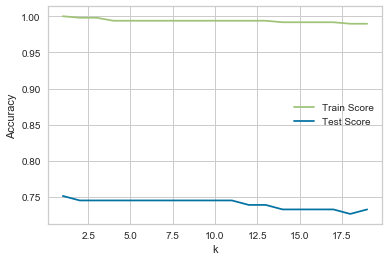

In [106]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [107]:
knn = KNeighborsClassifier(1)
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(knn, X, y, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))
print(scores)

Number of cv iterations:  643
Mean accuracy: 0.99
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 

In [108]:
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [109]:
pred_knn=knn.predict(X_test)

In [110]:
print(pred_knn)

[0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 1]


# Logistic Regression

In [111]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\skl

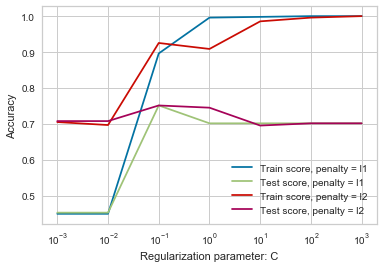

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [113]:
lreg=LogisticRegression(penalty='l2',C=1000)
lreg.fit(X_train,y_train)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
pred_lreg=lreg.predict(X_test)

# Linear Support Vector Machine

In [115]:
import numpy as np
from sklearn.svm import LinearSVC


best_score=0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = LinearSVC(C=C)
    scores = cross_val_score(svm, X_train, y_train, cv=5)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}
            
svm = LinearSVC(**best_parameters)
svm.fit(X_train, y_train)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\shashwat gupta\appdata\loc

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [116]:
predict_linearsvm = svm.predict(X_test)

# Kernelized Support Vector Machine

# Linear

In [117]:


import numpy as np
from sklearn.svm import SVC


best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel="linear",gamma=gamma, C=C)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
pred_linearkernelsvm=svm.predict(X_test)

# RBF

In [119]:
from sklearn.svm import SVC
import numpy as np
best_score=0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel="rbf",gamma=gamma, C=C)
        scores = cross_val_score(svm, X_train, y_train, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
pred_rbkkernelsvm=svm.predict(X_test)

<IPython.core.display.Javascript object>


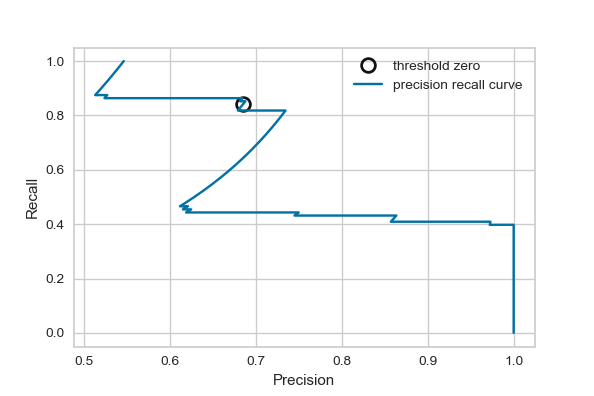

In [122]:
%matplotlib notebook
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svm.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

# SVC(kernal = poly)

In [124]:
C1 = [0.01,0.1,1,10]
gamma1 = [0.01,0.1,1,10]

for i in C1:
    for j in gamma1:
        svc = SVC(C=i,kernel='poly',gamma=j)
        svc.fit(X_train,y_train)
        print('C:{},gamma:{}'.format(i,j))
print('Train score: {:.4f},Test score: {:.4f}'.format(svc.score(X_train,y_train),svc.score(X_test,y_test)))

C:0.01,gamma:0.01
C:0.01,gamma:0.1
C:0.01,gamma:1
C:0.01,gamma:10
C:0.1,gamma:0.01
C:0.1,gamma:0.1
C:0.1,gamma:1
C:0.1,gamma:10
C:1,gamma:0.01
C:1,gamma:0.1
C:1,gamma:1
C:1,gamma:10
C:10,gamma:0.01
C:10,gamma:0.1
C:10,gamma:1
C:10,gamma:10
Train score: 1.0000,Test score: 0.5776


In [125]:
pred_polykernelsvm=svc.predict(X_test)

# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.80


In [127]:
np.count_nonzero(pred_knn)

100

In [128]:
from sklearn.metrics import f1_score

fknn = f1_score(y_test, pred_knn)
fklinsvm = f1_score(y_test, pred_linearkernelsvm)
fplysvm = f1_score(y_test, pred_polykernelsvm)
frbfsvm = f1_score(y_test, pred_rbkkernelsvm)
flinsvm = f1_score(y_test, predict_linearsvm)
flogreg = f1_score(y_test, pred_lreg)
fdectree = f1_score(y_test, pred_tree)

print("f1 score KNN: {:.2f}".format(fknn))
print("f1 score SVM with kernel = Linear: {:.2f}".format(fklinsvm))
print("f1 score SVC with kernel = poly: {:.2f}".format(fplysvm))
print("f1 score SVM with kernel = RBF: {:.2f}".format(frbfsvm))
print("f1 score Linear SVM: {:.2f}".format(flinsvm))
print("f1 score Logistic Regression: {:.2f}".format(flogreg))
print("f1 score Decision Tree: {:.2f}".format(fdectree))

recall_score score KNN: 0.79
recall_score score SVM with kernel = Linear: 0.68
recall_score score SVC with kernel = poly: 0.64
recall_score score SVM with kernel = RBF: 0.76
recall_score score Linear SVM: 0.76
recall_score score Logistic Regression: 0.76
recall_score score Decision Tree: 0.84


In [129]:
from sklearn.metrics import recall_score
rknn = recall_score(y_test, pred_knn)
rklinsvm = recall_score(y_test, pred_linearkernelsvm)
rplysvm = recall_score(y_test, pred_polykernelsvm)
rrbfsvm = recall_score(y_test, pred_rbkkernelsvm)
rlinsvm = recall_score(y_test, predict_linearsvm)
rlogreg = recall_score(y_test, pred_lreg)
rdectree = recall_score(y_test, pred_tree)

print("recall_score score KNN: {:.2f}".format(rknn))
print("recall_score score SVM with kernel = Linear: {:.2f}".format(rklinsvm))
print("recall_score score SVC with kernel = poly: {:.2f}".format(rplysvm))
print("recall_score score SVM with kernel = RBF: {:.2f}".format(rrbfsvm))
print("recall_score score Linear SVM: {:.2f}".format(rlinsvm))
print("recall_score score Logistic Regression: {:.2f}".format(rlogreg))
print("recall_score score Decision Tree: {:.2f}".format(rdectree))

recall_score score KNN: 0.84
recall_score score SVM with kernel = Linear: 0.51
recall_score score SVC with kernel = poly: 0.69
recall_score score SVM with kernel = RBF: 0.84
recall_score score Linear SVM: 0.84
recall_score score Logistic Regression: 0.84
recall_score score Decision Tree: 0.99


# Compairing F1 and Recall scores of Project 1 and Project 2

## F1 Score (P1 vs P2)

In [130]:
import pandas as pd
Comp_clsf = {'Classification Model':['KNN','SVM-(k=linear)','SVM-(k=poly)','SVM-(k=rbf)','linear-SVM','Logistic Regression', 'Dec-Tree'],\
             'Non-PCA f1 score ':[1.00,0.88,0.95,1.00,1.00,1.00,1.00],'PCA f1 score':[fknn, fklinsvm, fplysvm, frbfsvm,flinsvm, flogreg,fdectree]}
df1 = pd.DataFrame(Comp_clsf)
print(df1)

  Classification Model  Non-PCA f1 score   PCA f1 score
0                  KNN               1.00      0.787234
1       SVM-(k=linear)               0.88      0.676692
2         SVM-(k=poly)               0.95      0.642105
3          SVM-(k=rbf)               1.00      0.755102
4           linear-SVM               1.00      0.755102
5  Logistic Regression               1.00      0.755102
6             Dec-Tree               1.00      0.840580


## Recall Score (P1 vs P2)

In [131]:
import pandas as pd
Comp_clsf = {'Classification Model':['KNN','SVM-(k=linear)','SVM-(k=poly)','SVM-(k=rbf)','linear-SVM','Logistic Regression', 'Dec-Tree'],\
             'Non-PCA recall score ':[1.00,0.80,0.91,1.00,1.00,1.00,1.00],'PCA recall score':[rknn, rklinsvm, rplysvm, rrbfsvm,rlinsvm, rlogreg,rdectree]}
df2 = pd.DataFrame(Comp_clsf)
print(df2)

  Classification Model  Non-PCA recall score   PCA recall score
0                  KNN                   1.00          0.840909
1       SVM-(k=linear)                   0.80          0.511364
2         SVM-(k=poly)                   0.91          0.693182
3          SVM-(k=rbf)                   1.00          0.840909
4           linear-SVM                   1.00          0.840909
5  Logistic Regression                   1.00          0.840909
6             Dec-Tree                   1.00          0.988636


In [132]:
X = df[['District','Money_Value','PARA_A','PARA_B','Score','MONEY_Marks','Sector_score','History','Inherent_Risk']]

y=df['Risk_t']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, random_state=1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\users\shashwat gupta\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



### Apply deep learning models covered in class

In [134]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [135]:
# step 1: build the model
model1 = Sequential()
#input leyer
model1.add(Dense(20, input_dim = 9, activation = 'relu'))
#hidden layer
model1.add(Dense(15, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)

Epoch 1/20
482/482 [==============================] - 0s 626us/step - loss: 0.6918 - acc: 0.5353
Epoch 2/20
482/482 [==============================] - 0s 12us/step - loss: 0.6899 - acc: 0.5498
Epoch 3/20
482/482 [==============================] - 0s 12us/step - loss: 0.6879 - acc: 0.5498
Epoch 4/20
482/482 [==============================] - 0s 12us/step - loss: 0.6855 - acc: 0.5498
Epoch 5/20
482/482 [==============================] - 0s 14us/step - loss: 0.6828 - acc: 0.5498
Epoch 6/20
482/482 [==============================] - 0s 14us/step - loss: 0.6799 - acc: 0.5498
Epoch 7/20
482/482 [==============================] - 0s 12us/step - loss: 0.6766 - acc: 0.5498
Epoch 8/20
482/482 [==============================] - 0s 17us/step - loss: 0.6728 - acc: 0.5498
Epoch 9/20
482/482 [==============================] - 0s 12us/step - loss: 0.6684 - acc: 0.5498
Epoch 10/20
482/482 [==============================] - 0s 14us/step - loss: 0.6634 - acc: 0.5498
Epoch 11/20
482/482 [=================

In [136]:
print("Train Accuracy of Deep Neural Network:",model1.evaluate(X_train, y_train))
print("Train Accuracy of Deep Neural Network:",model1.evaluate(X_test, y_test))

482/482 [==============================] - 0s 147us/step
Train Accuracy of Deep Neural Network: [0.5402188484104837, 0.549792531120332]
161/161 [==============================] - 0s 18us/step
Train Accuracy of Deep Neural Network: [0.539726844485502, 0.546583850931677]
